## step1: Data Injestion

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [3]:
data = make_regression(n_samples=10000,n_features=1,n_informative=1,noise=13)

In [4]:
data[1]

array([ 184.67461506, -129.11748764, -123.47513178, ...,   62.18301795,
         72.64956095,  172.4762052 ])

In [5]:
df = pd.DataFrame(data[0],columns=['x'])
df.head()

,x
0,1.742574
1,-1.162677
2,-1.498627
3,-1.715525
4,-1.570220


In [6]:
df['y'] = data[1]
df.head()

,x,y
0,1.742574,184.674615
1,-1.162677,-129.117488
2,-1.498627,-123.475132
3,-1.715525,-170.831749
4,-1.570220,-167.443860


In [7]:
df

,x,y
0,1.742574,184.674615
1,-1.162677,-129.117488
2,-1.498627,-123.475132
3,-1.715525,-170.831749
4,-1.570220,-167.443860
...,...,...
9995,0.659626,57.508319
9996,-0.413852,-37.597556
9997,0.690607,62.183018
9998,0.728477,72.649561


In [8]:
from matplotlib import pyplot as plt

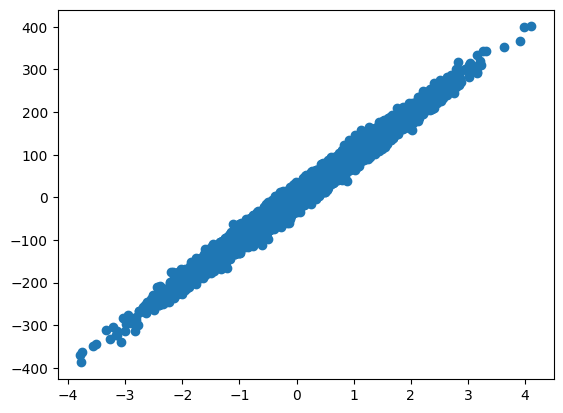

In [9]:
plt.scatter(df['x'],df['y'])
plt.show()

In [10]:
df.shape

(10000, 2)

## Step2 : Data preprocessing

In [11]:
df.describe()

,x,y
count,10000.000000,10000.000000
mean,0.008013,0.912308
std,0.993590,98.773655
min,-3.786619,-387.396628
25%,-0.669579,-65.775555
50%,-0.001843,0.145281
75%,0.671015,67.607679
max,4.106475,400.758718


## Spliting of data into train test

In [12]:
x = df['x']
y = df['y']

In [13]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,train_size=0.8)


In [14]:
x_train.shape,y_train.shape

((8000,), (8000,))

In [15]:
x_test.shape,y_test.shape

((2000,), (2000,))

In [16]:
x_train = np.array(x_train).reshape((-1,1))
y_train = np.array(y_train).reshape((-1,1))
x_test = np.array(x_test).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))


In [17]:
x_train.shape,y_train.shape

((8000, 1), (8000, 1))

## Step 4 +: Model Building

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [22]:
model.coef_

array([[98.57621908]])

In [23]:
model.intercept_

array([-0.02904923])

In [24]:
x_train.shape[0]

8000

In [25]:
from sklearn.model_selection import KFold

validation = KFold(50)


In [26]:
import numpy as np
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [27]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model,x,y,cv=validation)


In [28]:
print(result)

[0.98646082 0.97594123 0.98399693 0.98344235 0.97884537 0.98402607
 0.98532975 0.98626212 0.98424905 0.9838554  0.98339119 0.98211901
 0.98395265 0.98252123 0.98398145 0.97939568 0.98206461 0.98270123
 0.98273887 0.9803545  0.98392236 0.9831886  0.98389315 0.98193128
 0.98216724 0.98516007 0.97712758 0.98058993 0.98118984 0.97954215
 0.98114087 0.98220437 0.9863068  0.98258798 0.98233086 0.98158104
 0.98431835 0.98042582 0.98318526 0.98105005 0.98193119 0.97693059
 0.98406942 0.98021742 0.98162755 0.98582541 0.98411583 0.98090097
 0.97743168 0.98327973]


## Step 5: Model Evaluation

In [29]:
from sklearn.metrics import r2_score as r2

#for calculating adjusted R2 score
def adj_r2(act,pred):
    return 1 - ((1-r2(act,pred))*(act.shape[0]-1))/(act.shape[0]-1-1)

print("Adj. R2 Score:",adj_r2(y_train,y_train_pred))

Adj. R2 Score: 0.9825617303017269


In [30]:
print("Adj. R2 Score:",adj_r2(y_test,y_test_pred))

Adj. R2 Score: 0.9825150325261972


# saving the model

In [31]:
import pickle

In [32]:
with open("model.pkl",'wb') as file:
    pickle.dump(model,file)
    file.close()

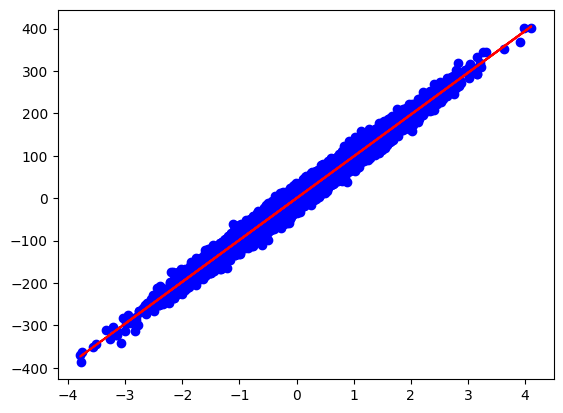

In [33]:
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='b')
plt.plot(x_train,y_train_pred,c='red')
plt.plot(x_test,y_test_pred,c='red')

plt.show()



# best model

In [34]:
# Bias varience tradeoff